In [79]:
import CGNS.MAP as MAP
import CGNS.PAT.cgnsutils as cgnsutils


In [80]:
# CGNSファイルを開く
(tree,links,paths) = MAP.load(r"../data/star_7431.cgns")

for p in cgnsutils.getAllPaths(tree): 
    print(p)

/Base
/Base/693A3T1X
/Base/693A3T1X/693A3T1X
/Base/693A3T1X/693A3T1X/ElementConnectivity
/Base/693A3T1X/693A3T1X/ElementRange
/Base/693A3T1X/GridCoordinates
/Base/693A3T1X/GridCoordinates/CoordinateX
/Base/693A3T1X/GridCoordinates/CoordinateY
/Base/693A3T1X/GridCoordinates/CoordinateZ
/Base/693A3T1X/StarZoneInfo
/Base/693A3T1X/StarZoneInfo/ContinuumName
/Base/693A3T1X/StarZoneInfo/RegionName
/Base/693A3T1X/StarZoneInfo/RegionType
/Base/693A3T1X/Zcon_693A3T1X
/Base/693A3T1X/ZoneType
/Base/DataClass
/Base/DimensionalUnits
/Base/DimensionalUnits/AdditionalUnits
/Base/Export Info:
/CGNSLibraryVersion


In [81]:
coordinate_path = cgnsutils.getPathsByTypeSet(tree,["GridCoordinates_t"])
coordinate_path

['/Base/693A3T1X/GridCoordinates']

In [82]:
GridCoordinates = cgnsutils.getNodeByPath(tree, coordinate_path[0])
GridCoordinates

['GridCoordinates',
 None,
 [['CoordinateX',
   array([ 0.001625  ,  0.00159197,  0.00148924, ..., -0.00098468,
          -0.00102187, -0.00106625]),
   [],
   'DataArray_t'],
  ['CoordinateY',
   array([0.00281458, 0.00275737, 0.00288872, ..., 0.00189155, 0.00176994,
          0.0018468 ]),
   [],
   'DataArray_t'],
  ['CoordinateZ',
   array([0.00338207, 0.00352493, 0.0035    , ..., 0.0002    , 0.0002    ,
          0.0002    ]),
   [],
   'DataArray_t']],
 'GridCoordinates_t']

In [83]:
X = GridCoordinates[2][0][1]
Y = GridCoordinates[2][1][1]
Z = GridCoordinates[2][2][1]

X.shape

(7431,)

In [84]:
X.mean(), Y.mean(), Z.mean()

(2.184655677895103e-06, 0.002534839333258675, 0.0020391533361824657)

In [85]:
# X *= -1
# Y *= -1

# MAP.save(r"../data/star_7431.cgns", tree)



In [86]:
import vtk
import numpy as np

file_name = lambda i: f'../data/random/Tetra_7431_{i}.vtu'
cgns_name = lambda i: file_name(i).replace('.vtu', '.cgns')

# Load the VTK file
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName(file_name(0))
reader.Update()

# Get the output data
data = reader.GetOutput()

# Get the points (coordinates)
points = data.GetPoints()

# Extract the coordinates
coordinates = []
for i in range(points.GetNumberOfPoints()):
    coordinate = points.GetPoint(i)
    coordinates.append(coordinate)

coordinates = np.array(coordinates)
coordinates.shape


(7431, 3)

In [89]:
X[:10], coordinates[:10, 0]

(array([0.001625  , 0.00159197, 0.00148924, 0.001625  , 0.00154223,
        0.00147166, 0.0014925 , 0.00136781, 0.00143922, 0.00155507]),
 array([0.001625  , 0.00159197, 0.00148924, 0.001625  , 0.00154223,
        0.00147471, 0.0014925 , 0.00136781, 0.00143922, 0.00155752]))

In [88]:
Y[:10], coordinates[:10, 1]

(array([0.00281458, 0.00275737, 0.00288872, 0.00281458, 0.00267123,
        0.00254899, 0.00258509, 0.00265317, 0.0024928 , 0.00269346]),
 array([0.00281458, 0.00275737, 0.00288871, 0.00281458, 0.00267123,
        0.00255428, 0.00258509, 0.00265317, 0.0024928 , 0.0026977 ]))

In [90]:
Z[:10], coordinates[:10, 2]


(array([0.00338207, 0.00352493, 0.0035    , 0.0035    , 0.00361246,
        0.00359941, 0.0037    , 0.0037    , 0.0037    , 0.0034576 ]),
 array([0.00338207, 0.00352493, 0.0035    , 0.0035    , 0.00361246,
        0.0036002 , 0.0037    , 0.0037    , 0.0037    , 0.00346355]))

In [92]:
Y.mean(), (Y-coordinates[:,1]).mean()

(0.002534839333258675, -1.8747164087231407e-05)

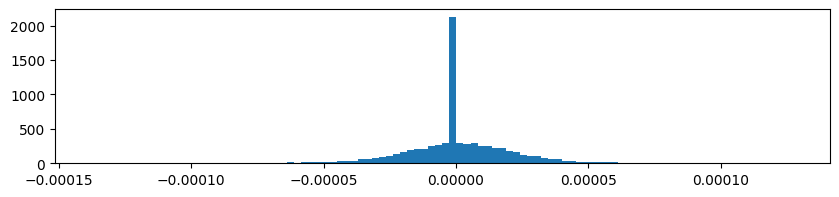

In [93]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 2))
plt.hist(X-coordinates[:, 0], bins=100)
plt.show()

In [94]:
X += -X+coordinates[:, 0] + 0
Y += -Y+coordinates[:, 1] + 0
Z += -Z+coordinates[:, 2] + 0


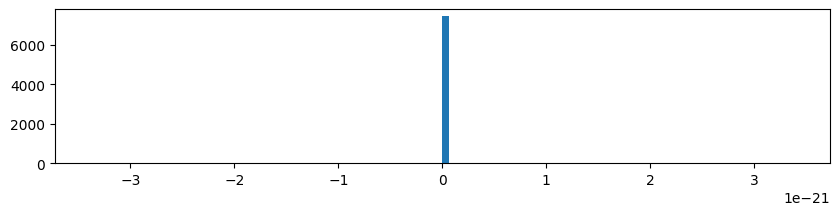

In [96]:
plt.figure(figsize=(10, 2))
plt.hist(X-coordinates[:, 0], bins=100)
plt.show()

In [97]:
MAP.save(cgns_name(0), tree)


In [99]:
output_span = 10

for i in range(90):
    reader = vtk.vtkXMLUnstructuredGridReader()
    reader.SetFileName(file_name(i))
    reader.Update()

    data = reader.GetOutput()
    points = data.GetPoints()

    coordinates = []
    for j in range(points.GetNumberOfPoints()):
        coordinate = points.GetPoint(j)
        coordinates.append(coordinate)

    coordinates = np.array(coordinates)

    X += -X+coordinates[:, 0]
    Y += -Y+coordinates[:, 1]
    Z += -Z+coordinates[:, 2]

    MAP.save(cgns_name(i) , tree)

    if i % output_span == 0:
        print(i)



0
10
20
30
40
50
60
70
80
